# Kresling Compression Test Analysis
The following code is used to plot the results of a Kresling compression test.

## Import Relevant Modules
Code runs on `numpy`, `matplotlib`, and `csv`. `numpy` is referred to as `np` and `matplotlib.pyplot` is referred to as `plt` for simplicity.

## Import .csv
To analyze the results of the test, the .csv file containing the test results must be opened. The `with` statement is a form of exception handling that uses the `__enter__()` and `__exit__()` methods built into `open()` that ensures the following code is run only when the file is opened correctly. It automatically closes the file at the end of the code block \[[1](https://www.geeksforgeeks.org/with-statement-in-python/)\].

The `as` keyword assigns an alias to a resource. In other words, `csv_file` is the alias for (a variable that refers to) the .csv file we're opening \[[2](https://www.geeksforgeeks.org/python-as-keyword/)\].

A csv reader object for our test results is stored in `csv_reader`. This object is essentially a collection of all the rows in our test results file, and every row is a list with a string for each column \[[3](https://docs.python.org/3/library/csv.html)\].

Numpy arrays are built to collect the three variables we care about: displacement, time, and force.

Now the lists in the csv reader object are iterated over so we can collect the relevant data in our numpy arrays. `row_count` ensures we skip the first four rows, which consist of empty cells and headers in the test results file. After the first four rows, we append the value from the corresponding column in each of our numpy arrays (ex: the first value \[0] is the first column, which has force values).

## Zeroing out the data
Now the three numpy arrays contain all the data for displacement, time, and force from the test results file. The force value is 135g lower than it should be because of the 135g weight on top of the Kresling. This is equal to 1.32435 N, which is subtracted from each force value in the force array.

## Plotting the data
Now the data is ready to be plotted. A Figure object and an Axes object are returned by the `plt.subplots()` method and stored into the `fig` and `ax` variables respectively \[[9](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)\].

The `plot(x,y)` method is called on `ax` to assign the force vs. displacement values to the y and x axes respectives \[[10](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)]. `set()` alters the the properties of the resulting plot: here it's used to label the axes \[[11](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html)\]. `grid()` configures the grid lines of the resulting plot \[[12](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)]. Finally, the figure is saved as a .png file via `savefig()` \[[13](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)\] and the plot is displayed via `show()` \[[14](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.show)\].

# Code
To Do:
- Force minimum vs. alpha graph (Ash)
- Average the plots so that there's just a single banana shape (Andrea)
- Stiffness in first 10% of displacement (Andrea)
- 
- Standard deviation and means for alpha graphs (for each alpha value set) (Ash)
- Stiffness along the displacement at different points (Andrea / Ash)
- Big graph with a bunch of subplots

## Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def pull_data(file_name_csv):
    HEADING_ROWS = 3 #there are headings in the first few rows
    with open(file_name_csv) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        row_count = 0
        disp = np.array([])
        time = np.array([])
        force = np.array([])
        for row in csv_reader:
            if row_count > HEADING_ROWS:
                disp = np.append(disp, float(row[1]))
                time = np.append(time, float(row[2]))
                force = np.append(force, float(row[0]))
            else:
                row_count += 1      

    #Note the force will usually not begin at zero -- the test begins (and displacement is zeroed) when a small amount of force is applied to the Kreslinh
    force = force - 1.32435 #Account for the weight of the white block on top of the Kresling (1.32435 N)
    return [disp, time, force]

def filter_by_cycle(DTF_data, start, end):
    disp = DTF_data[0][start:end]
    time = DTF_data[1][start:end]
    force = DTF_data[2][start:end]

    return [disp, time, force]

def find_bistability(DTF_data):
    disp = DTF_data[0]
    time = DTF_data[1]
    force = DTF_data[2]

    #Find the bistability point: aka the maximum value when displacement < -10
    ##Filter the data (https://www.w3schools.com/python/numpy/numpy_array_filter.asp)
    DISP_LIMIT = -10
    NEGATIVE_PLACEHOLDER = -300
    force_filtered = np.where(disp < DISP_LIMIT, force, NEGATIVE_PLACEHOLDER)
    disp_max = disp[np.argmax(force_filtered)]
    force_max = force_filtered.max()

    return [disp_max, force_max]
    
    
def gen_kresling_plot(DTF_data, graph_title):
    disp = DTF_data[0]
    time = DTF_data[1]
    force = DTF_data[2]
    
    fig, ax = plt.subplots()
    ax.plot(disp,force)
    
    ax.set(xlabel='Displacement (mm)', ylabel='Force (N)', title=graph_title)

    #Find pseudo-bistability point
    bistability_pt = find_bistability(DTF_data)
    disp_max = bistability_pt[0]
    force_max = bistability_pt[1]
    
    ##Locate the point on the graph and annotate it
    text = "force={:.3f}N, y={:.3f}mm".format(disp_max, force_max)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops = dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(disp_max, force_max), xytext=(0.5,0.96), **kw)
    
    ax.grid()
    
    fig.savefig("[" + graph_title + "]" + ".png")
    plt.show()
    return [disp_max, force_max]

## First Speed Setting

In [3]:
# Filtering out 1st speed setting
# Each start point was obtained by manually reviewing the CSV file
kresling_data = pull_data('kresling_L0.75_FS_A.csv')
A_L75 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.75_FS_B.csv')
B_L75 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.75_SF_C.csv')
C_L75 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.75_SF_D.csv')
D_L75 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.85_FS_C.csv')
C_L85 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.85_FS_D.csv')
D_L85 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.85_SF_E.csv')
E_L85 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.85_SF_F.csv')
F_L85 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.69_FS_A.csv')
A_L69 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.69_FS_B.csv')
B_L69 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.69_SF_C.csv')
C_L69 = filter_by_cycle(kresling_data,4,4250)

kresling_data = pull_data('kresling_L0.69_SF_D.csv')
D_L69 = filter_by_cycle(kresling_data,4,4250)

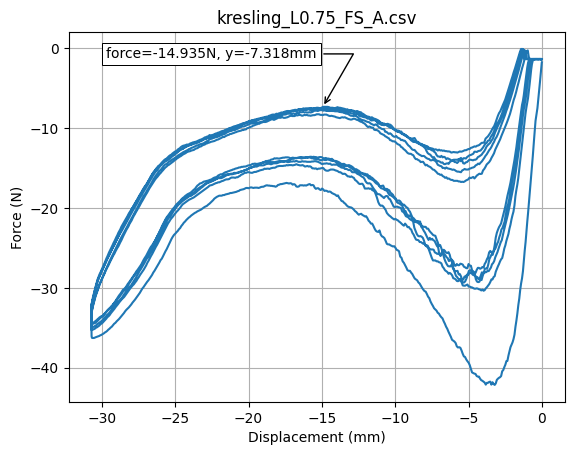

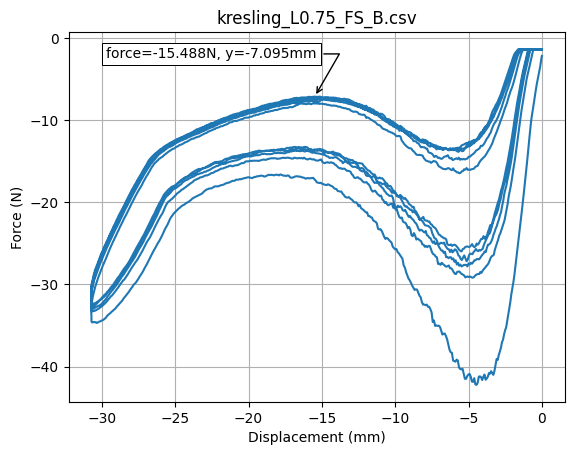

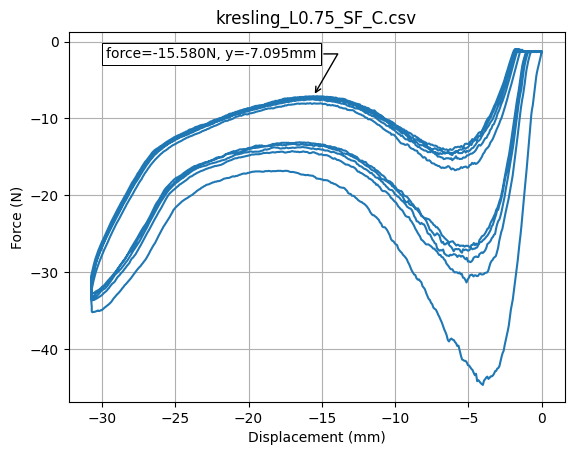

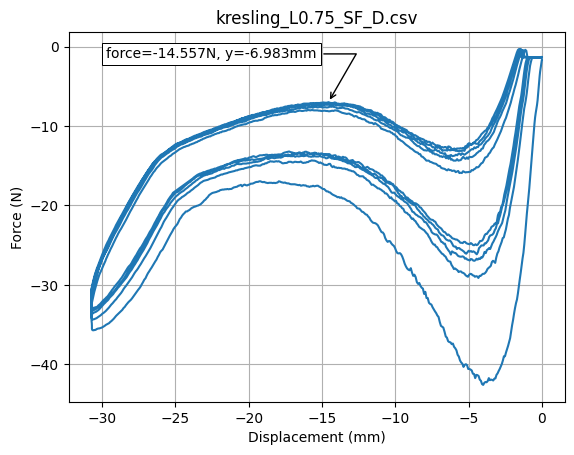

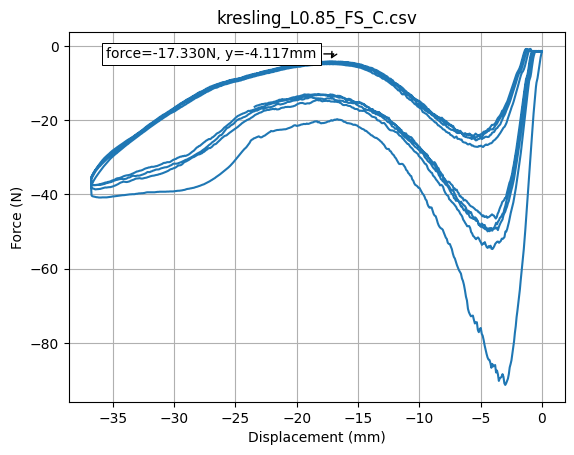

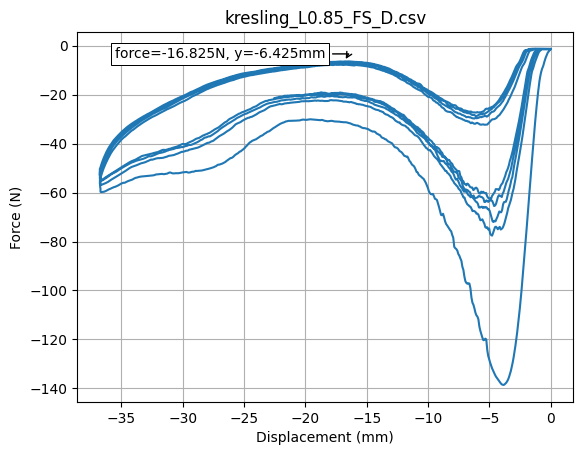

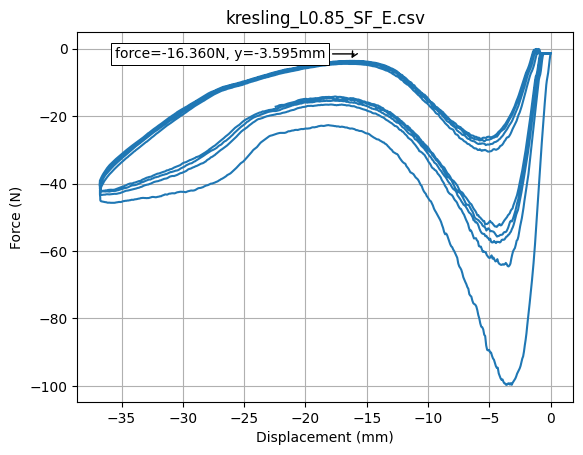

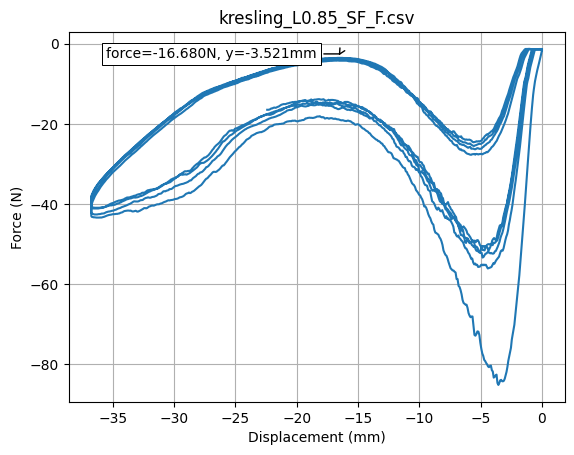

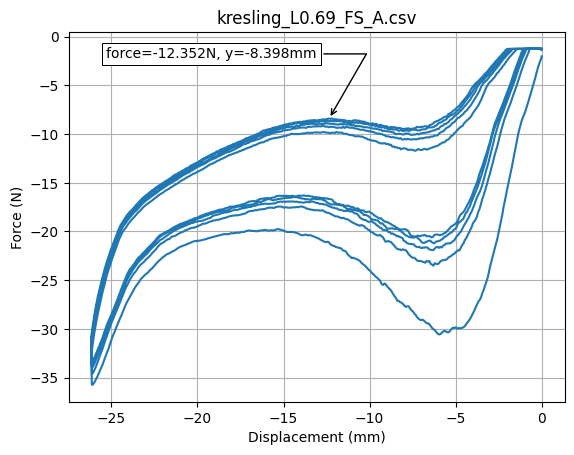

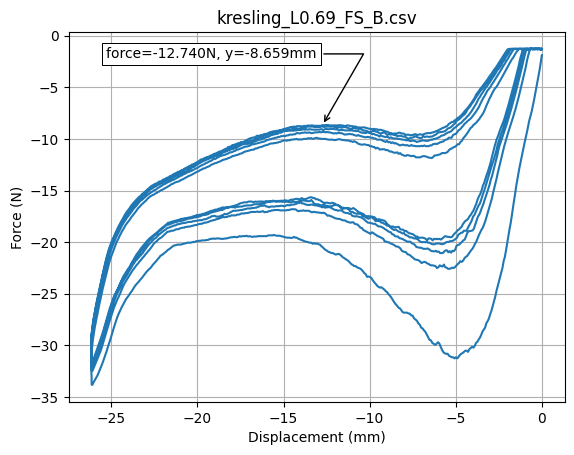

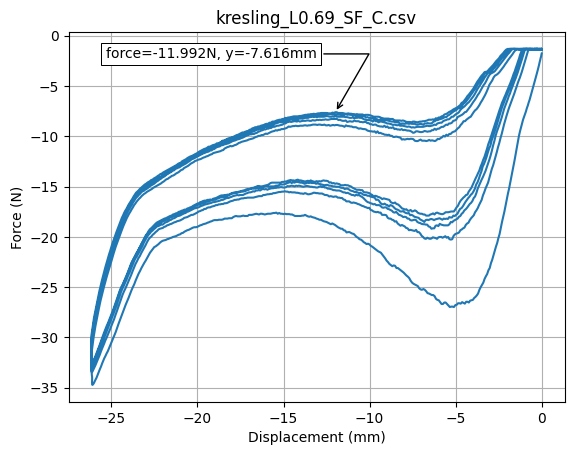

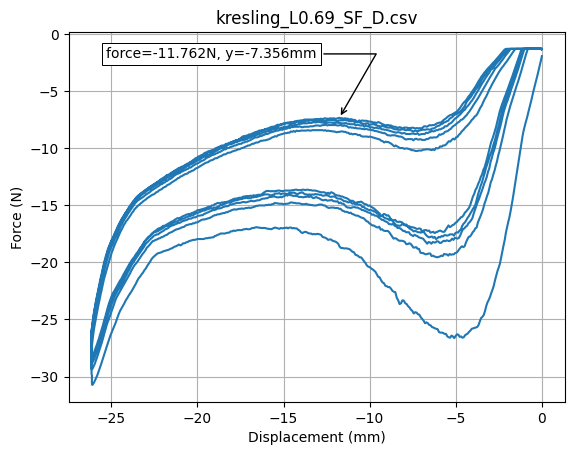

In [4]:
kresling_data_arr = [A_L75, B_L75, C_L75, D_L75, C_L85, D_L85, E_L85, F_L85, A_L69, B_L69, C_L69, D_L69]
file_names = ['kresling_L0.75_FS_A.csv','kresling_L0.75_FS_B.csv','kresling_L0.75_SF_C.csv','kresling_L0.75_SF_D.csv','kresling_L0.85_FS_C.csv','kresling_L0.85_FS_D.csv', 'kresling_L0.85_SF_E.csv', 'kresling_L0.85_SF_F.csv', 'kresling_L0.69_FS_A.csv','kresling_L0.69_FS_B.csv','kresling_L0.69_SF_C.csv','kresling_L0.69_SF_D.csv']
for i in range(12):
    gen_kresling_plot(kresling_data_arr[i],file_names[i]) 

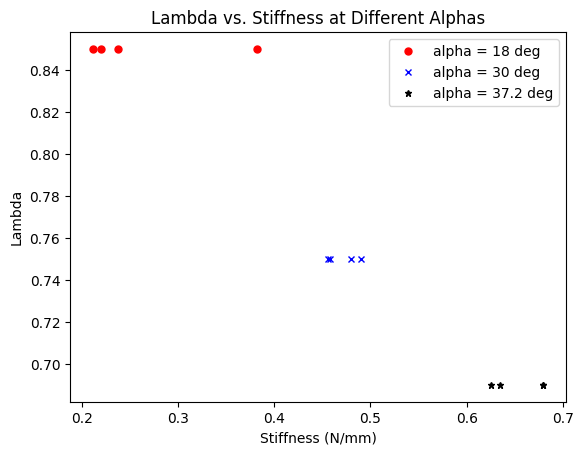

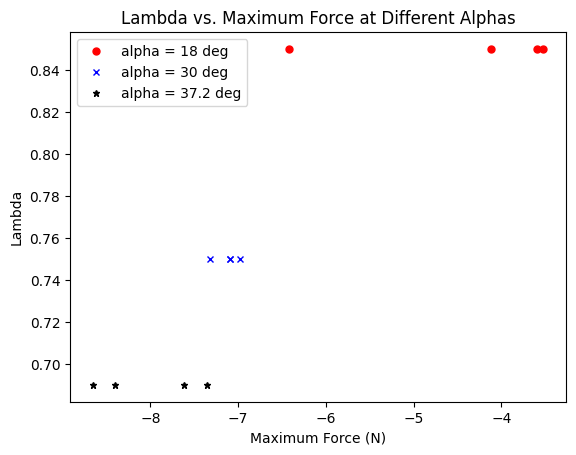

In [5]:
def gen_alpha_plots(DTF_arr):
    #Plotting stiffness at a point vs. lambda
    stiffness_alpha_30 = []
    stiffness_alpha_18 = []
    stiffness_alpha_37 = []
    
    #Plotting max force vs. lambda (1st cycle)
    max_force_alpha_30 = []
    max_force_alpha_18 = []
    max_force_alpha_37 = []
    
    for i in range(4):
        stiffness_inputs = find_bistability(DTF_arr[i])
        max_force_alpha_30.append(stiffness_inputs[1])
        stiffness_alpha_30.append(stiffness_inputs[1]/stiffness_inputs[0])
    
    for i in range(4):
        j = i + 4
        stiffness_inputs = find_bistability(DTF_arr[j])
        max_force_alpha_18.append(stiffness_inputs[1])
        stiffness_alpha_18.append(stiffness_inputs[1]/stiffness_inputs[0])
    
    for i in range(4):
        j = i + 8
        stiffness_inputs = find_bistability(DTF_arr[j])
        max_force_alpha_37.append(stiffness_inputs[1])
        stiffness_alpha_37.append(stiffness_inputs[1]/stiffness_inputs[0])
    
    #Stiffness
    m_size = 5
    alpha_18 = plt.plot(stiffness_alpha_18, np.full(4,0.85), color='red', marker='o', linestyle='None',markersize=m_size, label='alpha = 18 deg')
    alpha_30 = plt.plot(stiffness_alpha_30, np.full(4,0.75), color='blue', marker='x', linestyle='None',markersize=m_size, label='alpha = 30 deg')
    alpha_37 = plt.plot(stiffness_alpha_37, np.full(4,0.69), color='black', marker='*', linestyle='None',markersize=m_size, label='alpha = 37.2 deg')
    
    plt.xlabel('Stiffness (N/mm)')
    plt.ylabel('Lambda')
    plt.title('Lambda vs. Stiffness at Different Alphas')
    plt.legend()
    plt.show()
    
    #Max force
    alpha_18 = plt.plot(max_force_alpha_18, np.full(4,0.85), color='red', marker='o', linestyle='None',markersize=m_size, label='alpha = 18 deg')
    alpha_30 = plt.plot(max_force_alpha_30, np.full(4,0.75), color='blue', marker='x', linestyle='None',markersize=m_size, label='alpha = 30 deg')
    alpha_37 = plt.plot(max_force_alpha_37, np.full(4,0.69), color='black', marker='*', linestyle='None',markersize=m_size, label='alpha = 37.2 deg')
    
    plt.xlabel('Maximum Force (N)')
    plt.ylabel('Lambda')
    plt.title('Lambda vs. Maximum Force at Different Alphas')
    plt.legend()
    plt.show()

gen_alpha_plots(kresling_data_arr)

## Second Speed Setting

In [6]:
# Filtering out 2nd speed setting
# Each start point was obtained by manually reviewing the CSV file
kresling_data = pull_data('kresling_L0.75_FS_A.csv')
A_L75 = filter_by_cycle(kresling_data,10296,12729)

kresling_data = pull_data('kresling_L0.75_FS_B.csv')
B_L75 = filter_by_cycle(kresling_data,10264,12721)

kresling_data = pull_data('kresling_L0.75_SF_C.csv')
C_L75 = filter_by_cycle(kresling_data,10397,46469)

kresling_data = pull_data('kresling_L0.75_SF_D.csv')
D_L75 = filter_by_cycle(kresling_data,10350,47509)

kresling_data = pull_data('kresling_L0.85_FS_C.csv')
C_L85 = filter_by_cycle(kresling_data,10964,13755)

kresling_data = pull_data('kresling_L0.85_FS_D.csv')
D_L85 = filter_by_cycle(kresling_data,10966,13749)

kresling_data = pull_data('kresling_L0.85_SF_E.csv')
E_L85 = filter_by_cycle(kresling_data,10998,28707)

kresling_data = pull_data('kresling_L0.85_SF_F.csv')
F_L85 = filter_by_cycle(kresling_data,11004,28681)

kresling_data = pull_data('kresling_L0.69_FS_A.csv')
A_L69 = filter_by_cycle(kresling_data,9737,11869)

kresling_data = pull_data('kresling_L0.69_FS_B.csv')
B_L69 = filter_by_cycle(kresling_data,9759,11902)

kresling_data = pull_data('kresling_L0.69_SF_C.csv')
C_L69 = filter_by_cycle(kresling_data,9740,41411)

kresling_data = pull_data('kresling_L0.69_SF_D.csv')
D_L69 = filter_by_cycle(kresling_data,9762,41462)

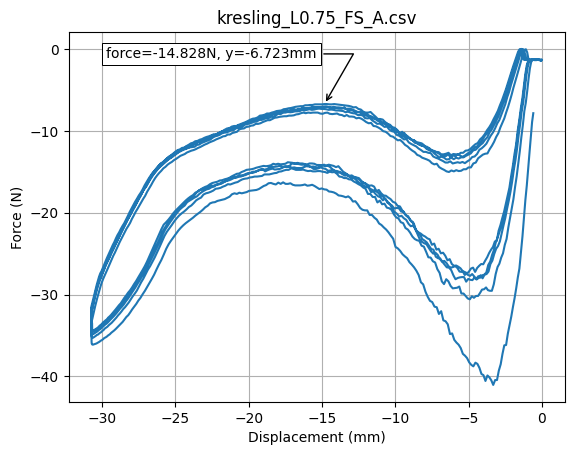

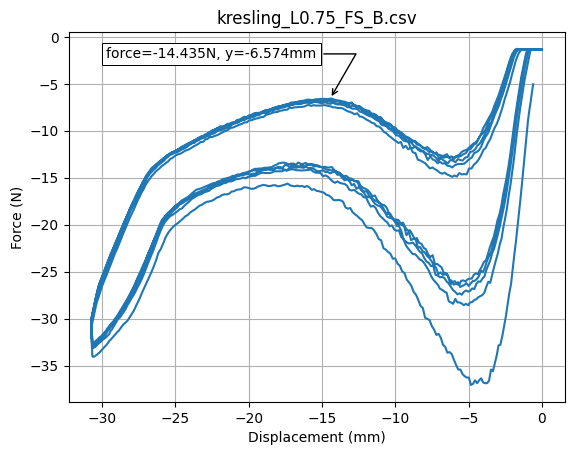

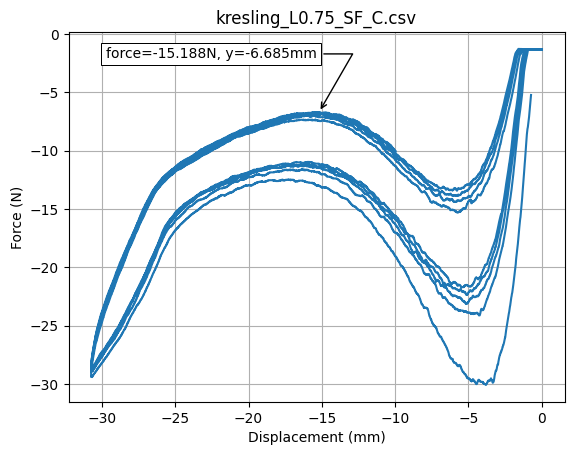

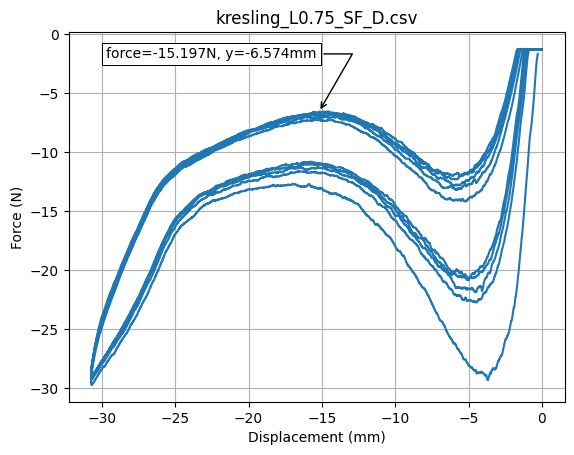

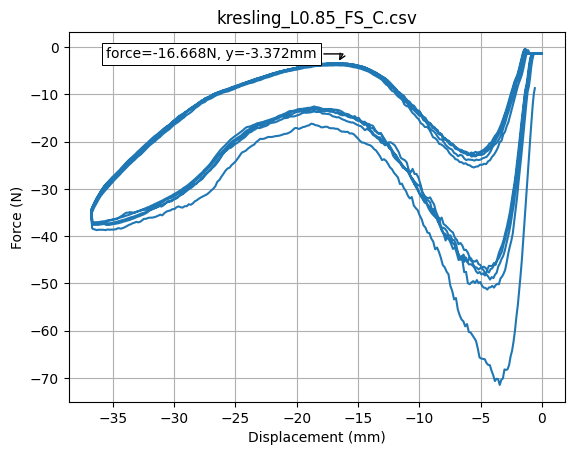

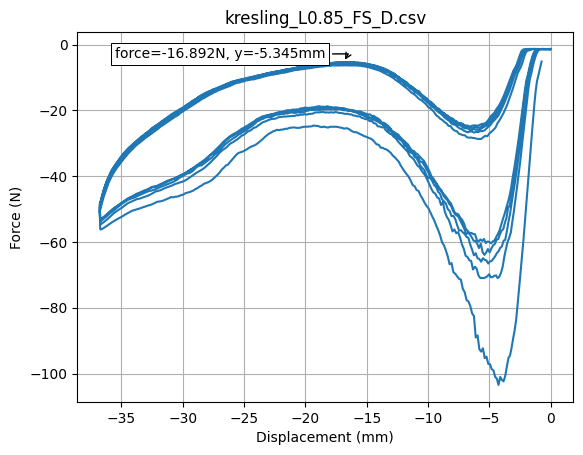

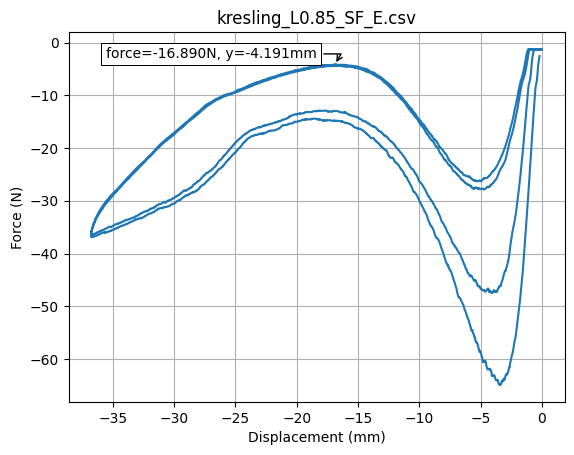

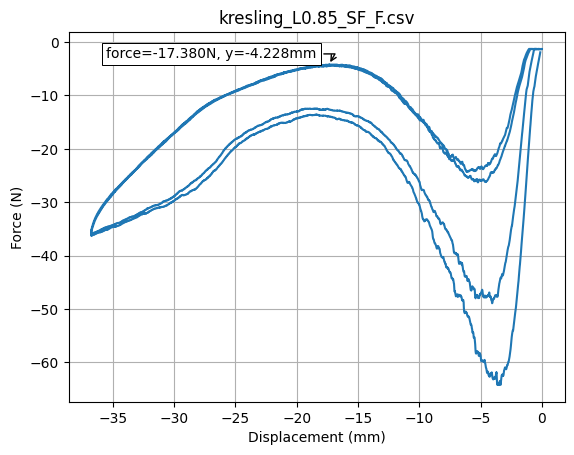

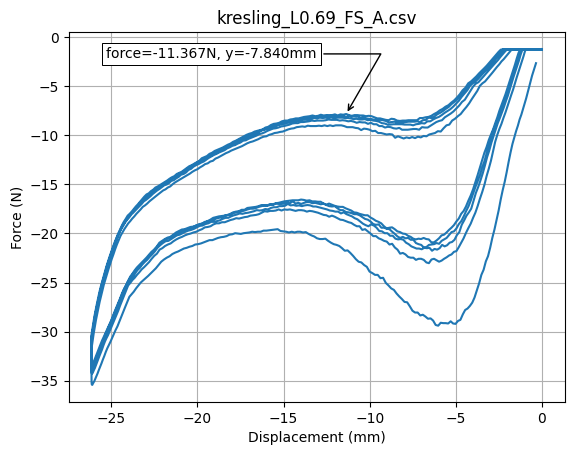

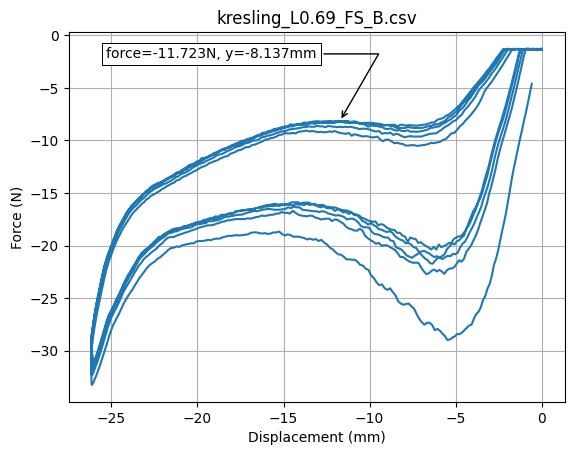

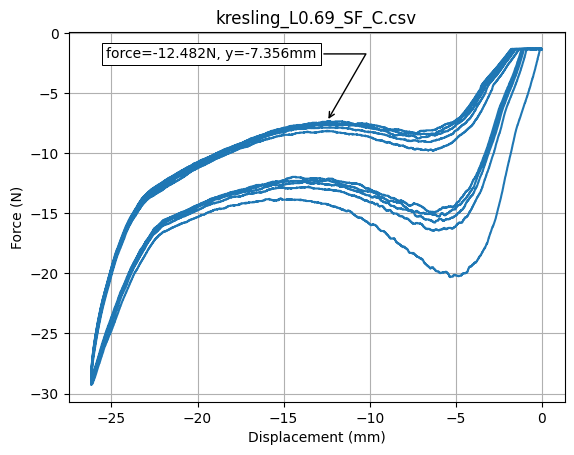

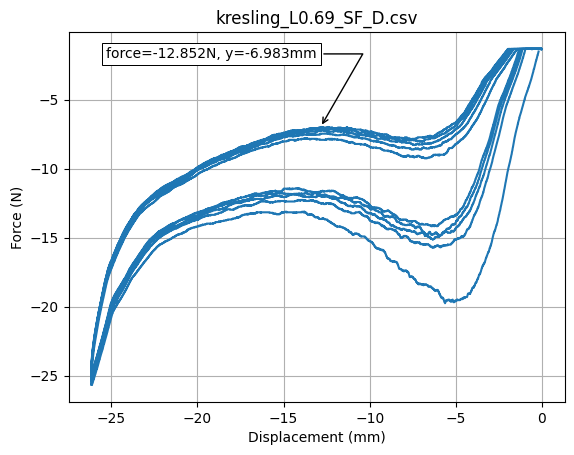

In [7]:
kresling_data_arr = [A_L75, B_L75, C_L75, D_L75, C_L85, D_L85, E_L85, F_L85, A_L69, B_L69, C_L69, D_L69]
file_names = ['kresling_L0.75_FS_A.csv','kresling_L0.75_FS_B.csv','kresling_L0.75_SF_C.csv','kresling_L0.75_SF_D.csv','kresling_L0.85_FS_C.csv','kresling_L0.85_FS_D.csv', 'kresling_L0.85_SF_E.csv', 'kresling_L0.85_SF_F.csv', 'kresling_L0.69_FS_A.csv','kresling_L0.69_FS_B.csv','kresling_L0.69_SF_C.csv','kresling_L0.69_SF_D.csv']
for i in range(12):
    gen_kresling_plot(kresling_data_arr[i],file_names[i]) 

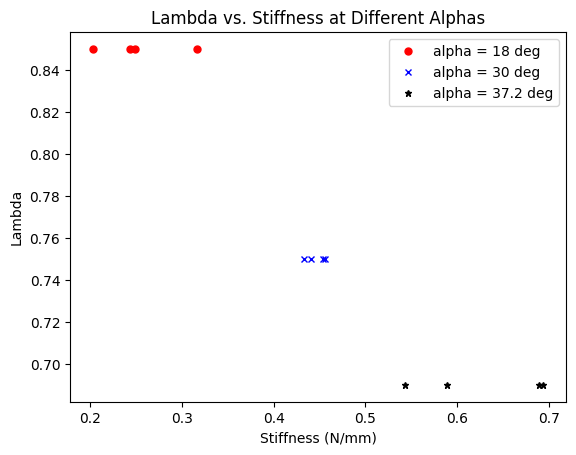

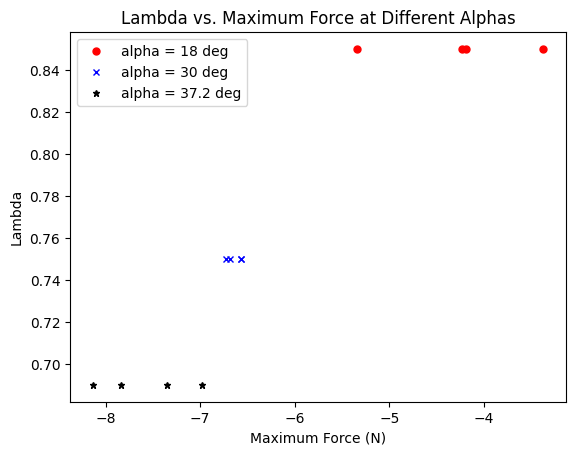

In [8]:
gen_alpha_plots(kresling_data_arr)

## 3rd Speed Setting

In [9]:
# Filtering out 3rd speed setting
# Each start point was obtained by manually reviewing the CSV file
kresling_data = pull_data('kresling_L0.75_FS_A.csv')
A_L75 = filter_by_cycle(kresling_data,18826,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.75_FS_B.csv')
B_L75 = filter_by_cycle(kresling_data,18836,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.75_SF_C.csv')
C_L75 = filter_by_cycle(kresling_data,53715,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.75_SF_D.csv')
D_L75 = filter_by_cycle(kresling_data,53758,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.85_FS_C.csv')
C_L85 = filter_by_cycle(kresling_data,19862,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.85_FS_D.csv')
D_L85 = filter_by_cycle(kresling_data,19882,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.85_SF_E.csv')
E_L85 = filter_by_cycle(kresling_data,61643,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.85_SF_F.csv')
F_L85 = filter_by_cycle(kresling_data,61643,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.69_FS_A.csv')
A_L69 = filter_by_cycle(kresling_data,17992,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.69_FS_B.csv')
B_L69 = filter_by_cycle(kresling_data,18047,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.69_SF_C.csv')
C_L69 = filter_by_cycle(kresling_data,47672,kresling_data[0].size)

kresling_data = pull_data('kresling_L0.69_SF_D.csv')
D_L69 = filter_by_cycle(kresling_data,47750,kresling_data[0].size)

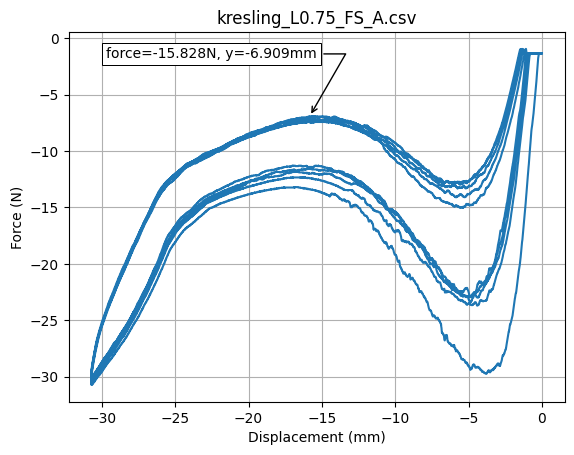

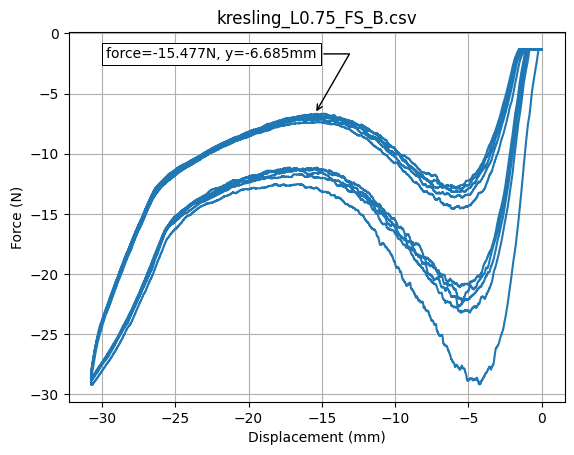

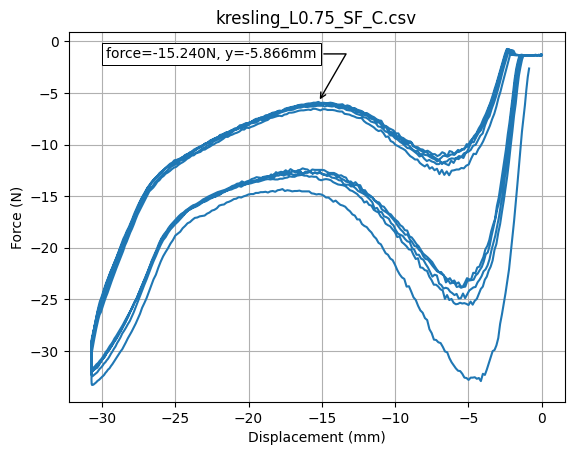

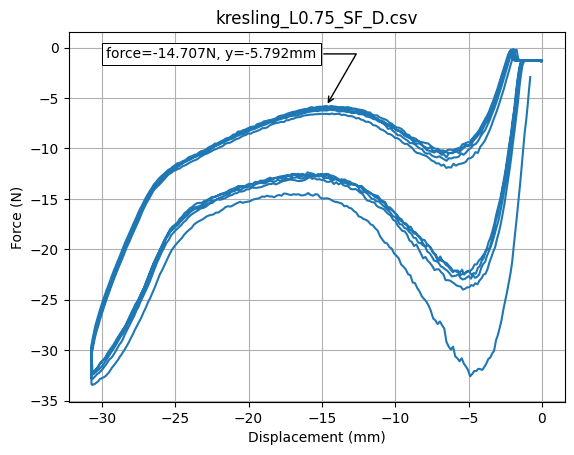

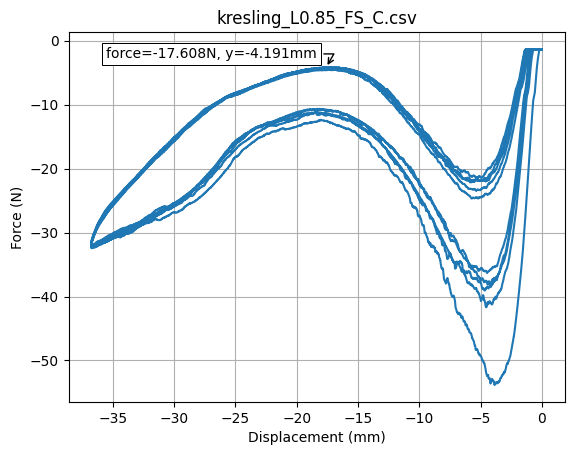

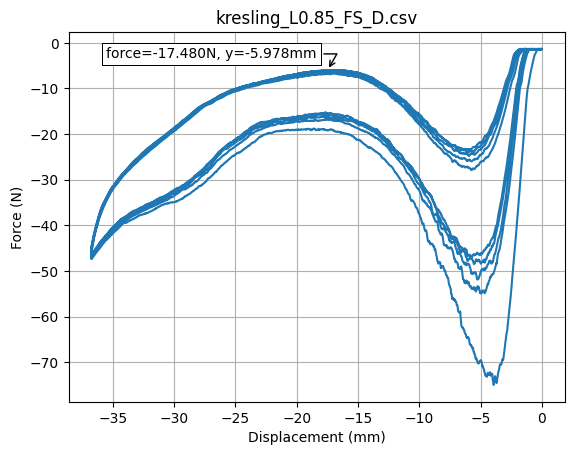

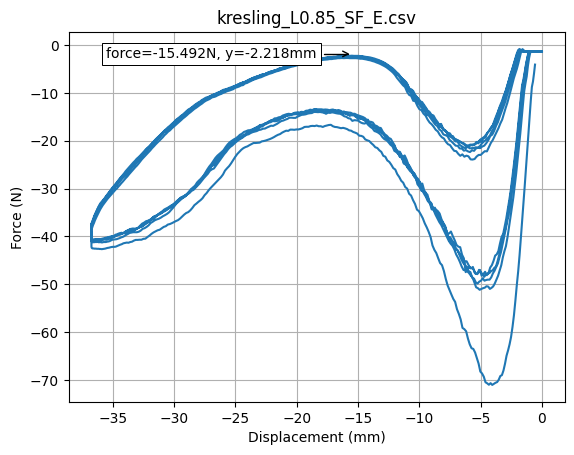

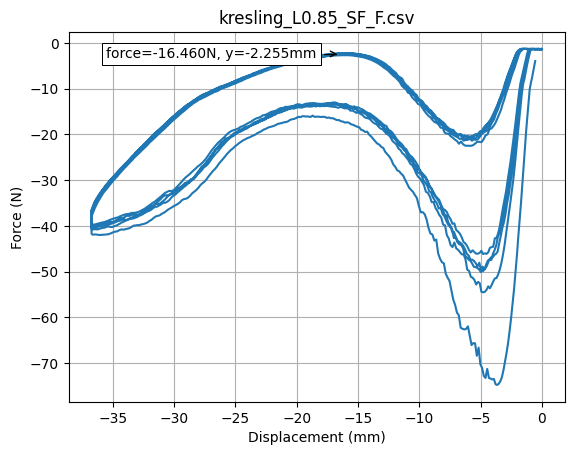

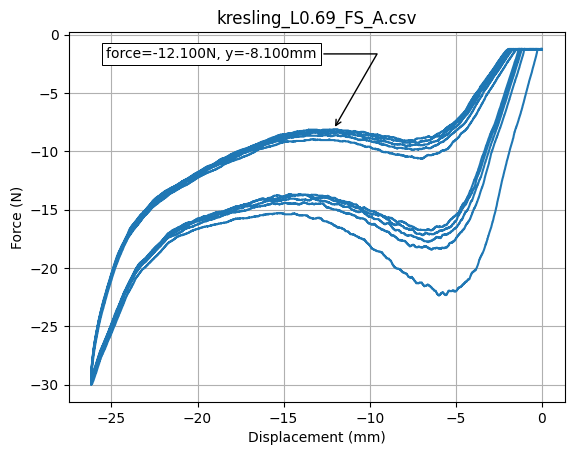

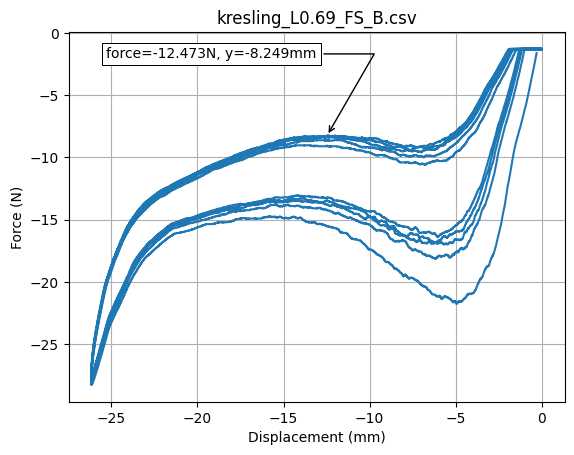

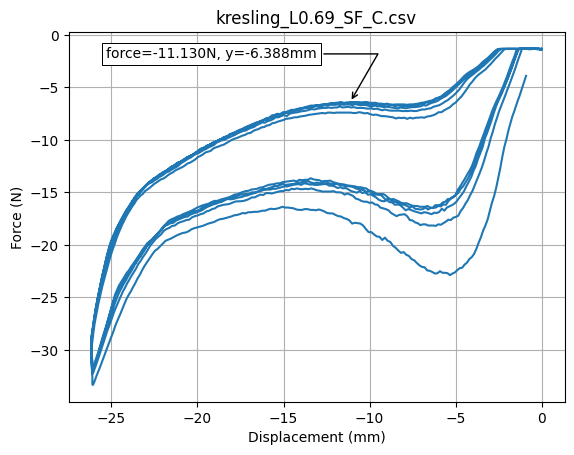

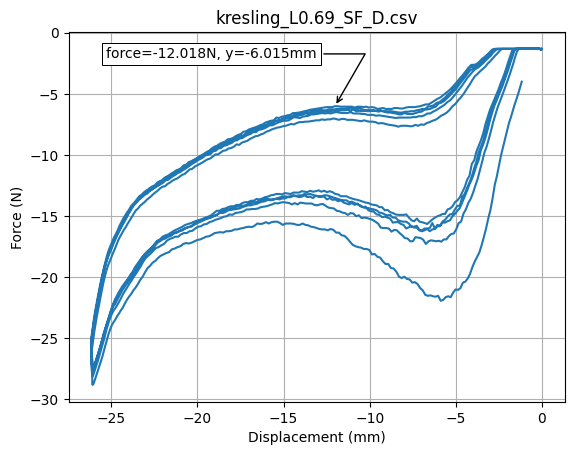

In [10]:
kresling_data_arr = [A_L75, B_L75, C_L75, D_L75, C_L85, D_L85, E_L85, F_L85, A_L69, B_L69, C_L69, D_L69]
file_names = ['kresling_L0.75_FS_A.csv','kresling_L0.75_FS_B.csv','kresling_L0.75_SF_C.csv','kresling_L0.75_SF_D.csv','kresling_L0.85_FS_C.csv','kresling_L0.85_FS_D.csv', 'kresling_L0.85_SF_E.csv', 'kresling_L0.85_SF_F.csv', 'kresling_L0.69_FS_A.csv','kresling_L0.69_FS_B.csv','kresling_L0.69_SF_C.csv','kresling_L0.69_SF_D.csv']
for i in range(12):
    gen_kresling_plot(kresling_data_arr[i],file_names[i]) 

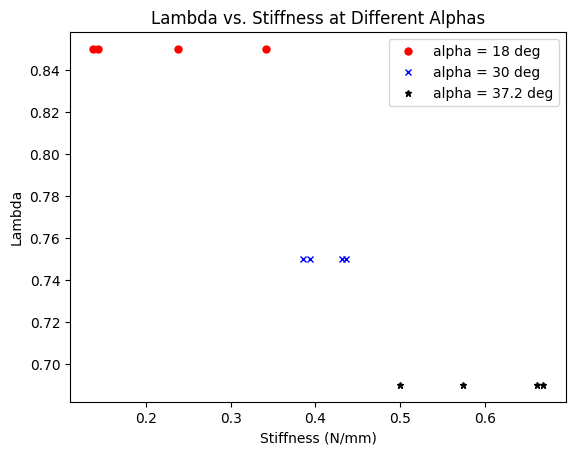

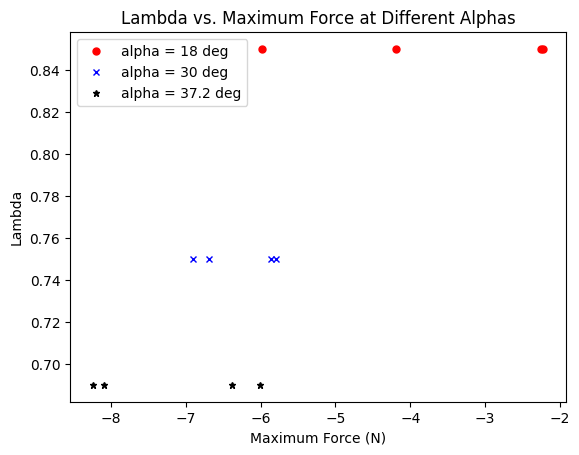

In [11]:
gen_alpha_plots(kresling_data_arr)

## All Speed Settings

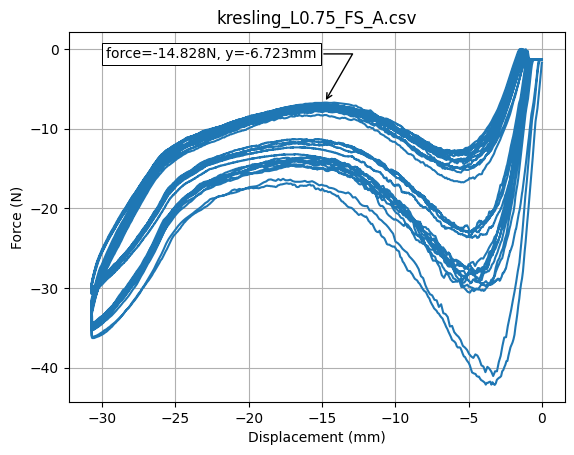

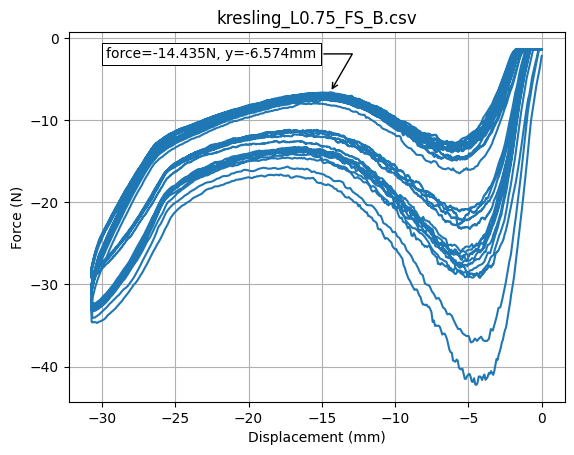

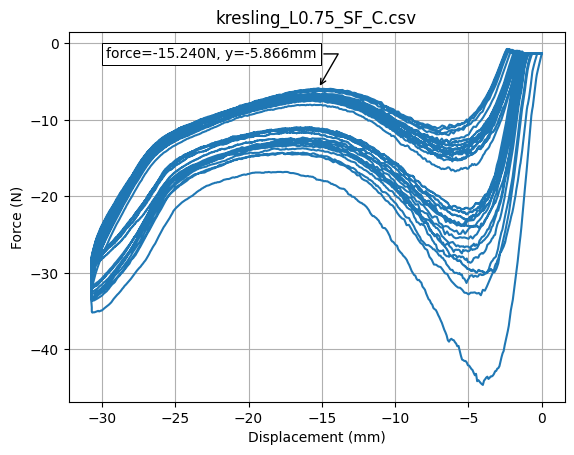

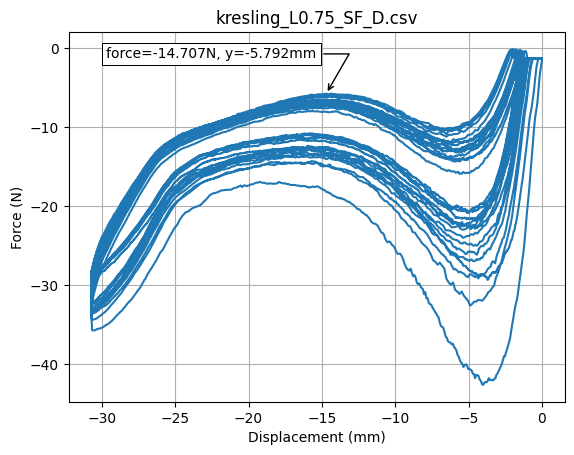

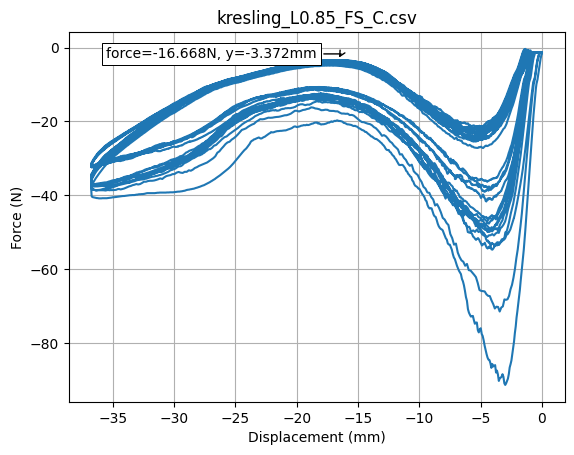

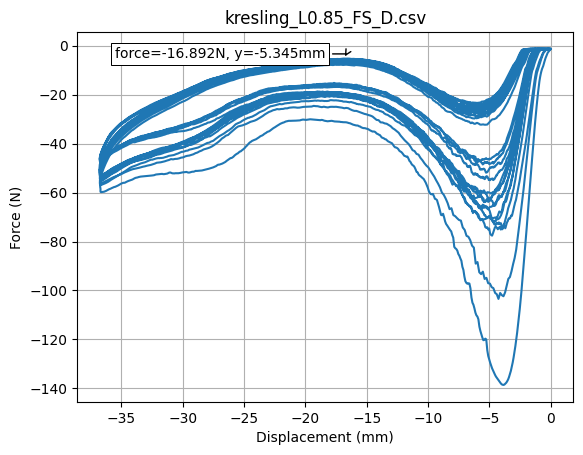

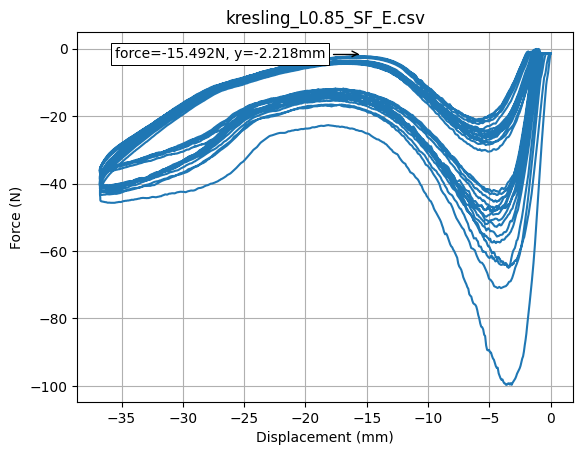

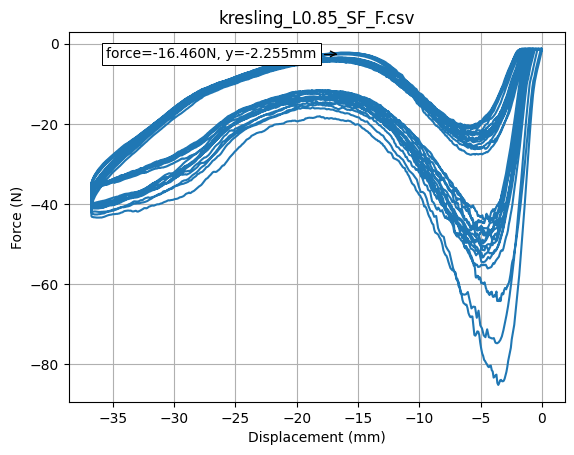

In [12]:
file_names = ['kresling_L0.75_FS_A.csv','kresling_L0.75_FS_B.csv','kresling_L0.75_SF_C.csv','kresling_L0.75_SF_D.csv','kresling_L0.85_FS_C.csv','kresling_L0.85_FS_D.csv', 'kresling_L0.85_SF_E.csv', 'kresling_L0.85_SF_F.csv']

#Plot all speed settings
for file_name in file_names:
    kresling_data = pull_data(file_name)
    gen_kresling_plot(kresling_data, file_name)